In [ ]:
 !pip install torch torchvision dominate visdom matplotlib

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh maps

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/maps/train/resized/401.jpg  
  inflating: ./datasets/maps/train/resized/344.jpg  
  inflating: ./datasets/maps/train/resized/999.jpg  
  inflating: ./datasets/maps/train/resized/62.jpg  
  inflating: ./datasets/maps/train/resized/913.jpg  
  inflating: ./datasets/maps/train/resized/685.jpg  
  inflating: ./datasets/maps/train/resized/537.jpg  
  inflating: ./datasets/maps/train/resized/381.jpg  
  inflating: ./datasets/maps/train/resized/1024.jpg  
  inflating: ./datasets/maps/train/resized/645.jpg  
  inflating: ./datasets/maps/train/resized/135.jpg  
  inflating: ./datasets/maps/train/resized/259.jpg  
  inflating: ./datasets/maps/train/resized/1069.jpg  
  inflating: ./datasets/maps/train/resized/141.jpg  
  inflating: ./datasets/maps/train/resized/91.jpg  
  inflating: ./datasets/maps/train/resized/795.jpg  
  inflating: ./datasets/maps/train/resized/418.jpg  
  inflating: ./datasets/maps/train/resized/269.j

In [ ]:
!python train.py --dataroot ./datasets/maps --name maps_cyclegan_2hr_final \
                 --model cycle_gan --netG resnet_6blocks \
                 --load_size 143 --crop_size 128 \
                 --n_epochs 20 --n_epochs_decay 20

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 128                           	[default: 256]
                 dataroot: ./datasets/maps               	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
             display_freq: 400                           
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                             
                 gan_mode: lsgan                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             

--- Displaying results for Epoch 1 ---

Successfully saved plot to latest_results.png


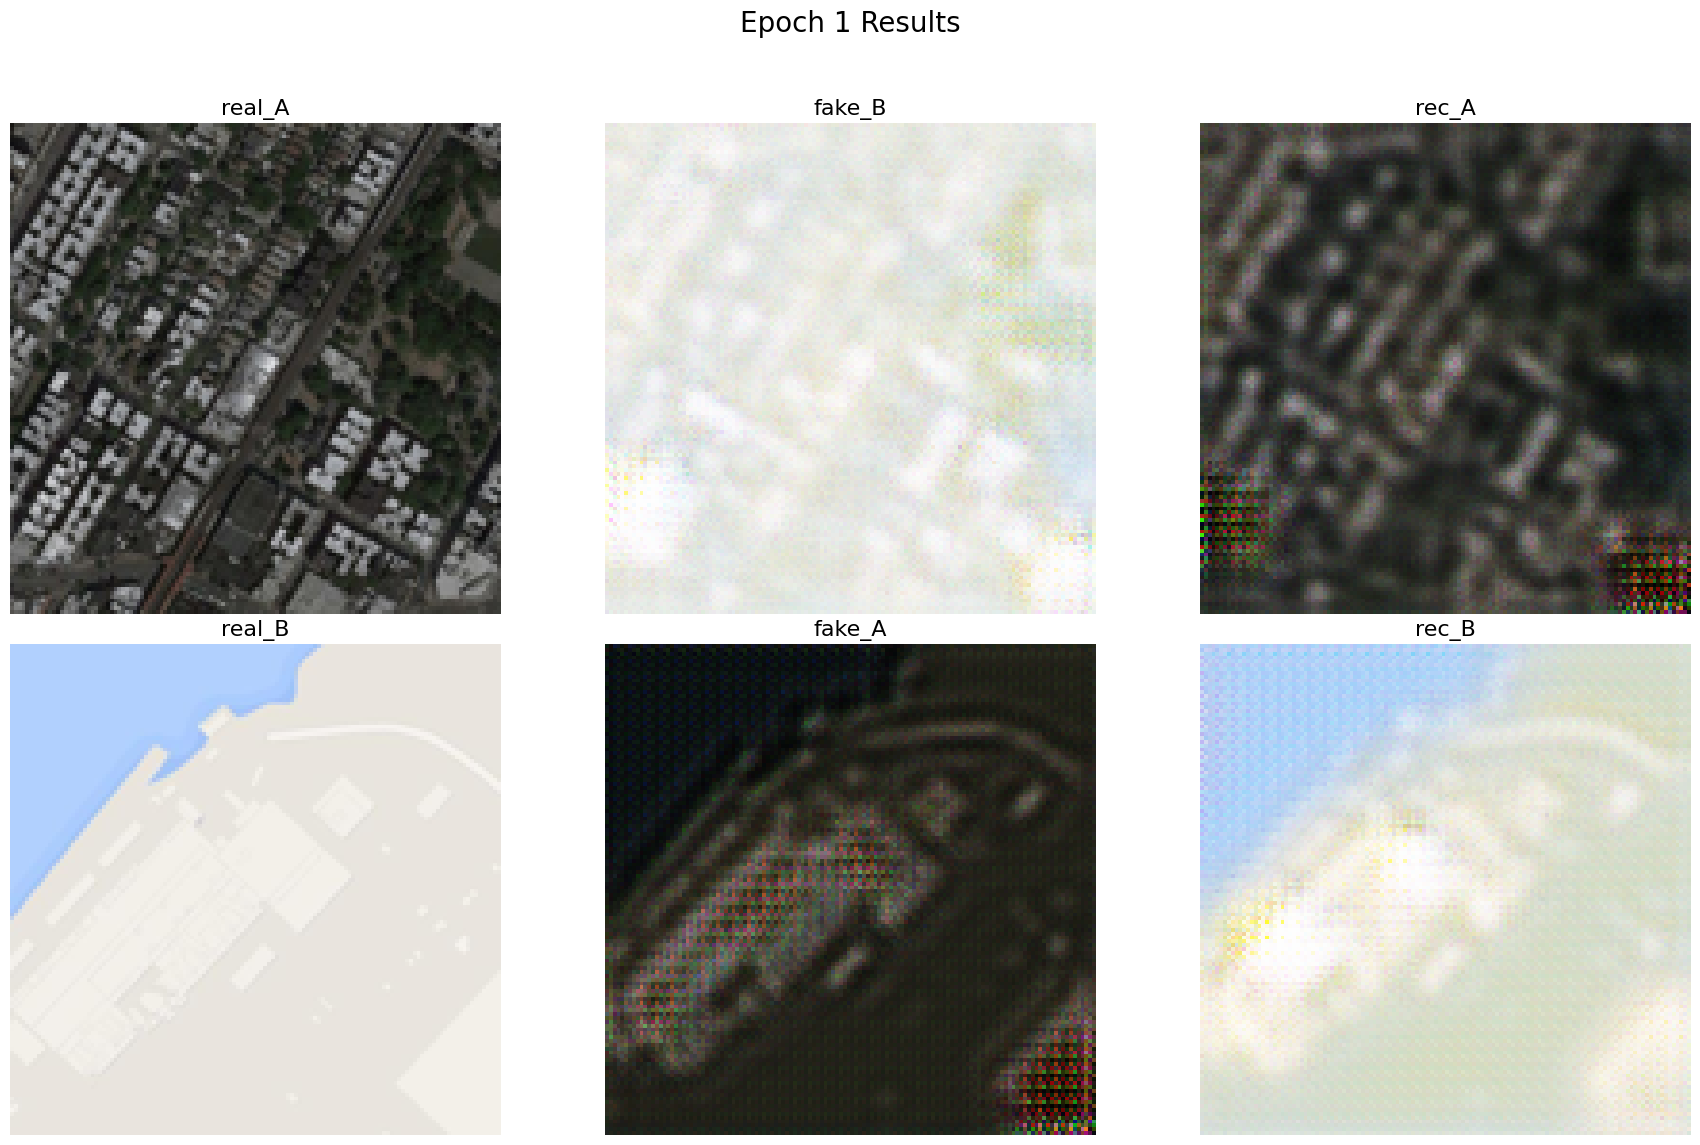

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob
import re

# --- Configuration ---
# This must match the 'name' of your training run
experiment_name = "maps_cyclegan_2hr"
checkpoints_dir = "./checkpoints"


def get_latest_epoch(images_dir):
    """Find the highest epoch number from the saved image files."""
    files = glob.glob(os.path.join(images_dir, "epoch*_real_A.png"))
    if not files:
        return 0

    max_epoch = 0
    for f in files:
        basename = os.path.basename(f)
        match = re.search(r'epoch(\d+)_', basename)
        if match:
            epoch_num = int(match.group(1))
            if epoch_num > max_epoch:
                max_epoch = epoch_num
    return max_epoch

def plot_latest_results():
    """Load and display the 6 key images from the latest epoch."""

    images_dir = os.path.join(checkpoints_dir, experiment_name, "web", "images")

    if not os.path.exists(images_dir):
        print(f"Error: Directory not found: {images_dir}")
        print("Please check your 'experiment_name' or wait for the first epoch to complete.")
        return

    latest_epoch = get_latest_epoch(images_dir)

    if latest_epoch == 0:
        print(f"No epoch images found in {images_dir} yet.")
        print("Waiting for epoch 1 to complete (or for iteration 1000)...")
        return

    print(f"--- Displaying results for Epoch {latest_epoch} ---")

    # Define the 6 images we want to show
    image_types = [
        'real_A', 'fake_B', 'rec_A',
        'real_B', 'fake_A', 'rec_B'
    ]

    # Create a 2x3 plot
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Epoch {latest_epoch} Results', fontsize=20)

    for i, img_type in enumerate(image_types):
        # Construct file path, e.g., "epoch001_real_A.png"
        img_name = f"epoch{latest_epoch:03d}_{img_type}.png"
        img_path = os.path.join(images_dir, img_name)

        row = i // 3
        col = i % 3

        ax = axs[row, col]

        try:
            # Open and display the image
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(img_type, fontsize=16)
            ax.axis('off')
        except FileNotFoundError:
            print(f"Warning: Image not found (yet?): {img_path}")
            ax.set_title(f"{img_type}\n(Not found)", fontsize=16)
            ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot to a file so you can view it
    output_filename = "latest_results.png"
    plt.savefig(output_filename)
    print(f"\nSuccessfully saved plot to {output_filename}")

    # Try to show it directly if in a notebook
    try:
        plt.show()
    except Exception as e:
        print(f"Could not display plot directly. Please open {output_filename}")

if __name__ == "__main__":
    plot_latest_results()
